#import the dependencies

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [60]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [61]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [62]:
from citipy import citipy

In [63]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [64]:
# import requests
import requests
#get API key
from config import weather_api_key
#Build base url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [65]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | nakatsu
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | iwanai
Processing Record 11 of Set 1 | chicama
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | oussouye
Processing Record 14 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | la paz
Processing Record 17 of Set 1 | along
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | rikitea
Processing Rec

In [66]:
len(city_data)

555

In [67]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,65.89,73,42,16.17,ZA,2021-12-18 04:50:41
1,Jamestown,42.0970,-79.2353,35.29,91,40,3.44,US,2021-12-18 04:53:51
2,Chokurdakh,70.6333,147.9167,-39.08,100,75,5.50,RU,2021-12-18 04:52:43
3,Ribeira Grande,38.5167,-28.7000,60.22,56,100,14.03,PT,2021-12-18 04:53:51
4,Nakatsu,33.5981,131.1883,46.18,46,93,14.03,JP,2021-12-18 04:53:52
5,Upernavik,72.7868,-56.1549,14.70,58,100,7.58,GL,2021-12-18 04:53:52
6,Nikolskoye,59.7035,30.7861,30.09,98,100,3.27,RU,2021-12-18 04:53:52
7,Busselton,-33.6500,115.3333,66.04,71,84,15.59,AU,2021-12-18 04:53:53
8,Iwanai,42.9744,140.5089,19.94,85,98,14.20,JP,2021-12-18 04:53:53
9,Chicama,-7.8447,-79.1469,61.34,83,37,6.15,PE,2021-12-18 04:53:53


In [68]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-12-18 04:50:41,-34.4187,19.2345,65.89,73,42,16.17
1,Jamestown,US,2021-12-18 04:53:51,42.0970,-79.2353,35.29,91,40,3.44
2,Chokurdakh,RU,2021-12-18 04:52:43,70.6333,147.9167,-39.08,100,75,5.50
3,Ribeira Grande,PT,2021-12-18 04:53:51,38.5167,-28.7000,60.22,56,100,14.03
4,Nakatsu,JP,2021-12-18 04:53:52,33.5981,131.1883,46.18,46,93,14.03
5,Upernavik,GL,2021-12-18 04:53:52,72.7868,-56.1549,14.70,58,100,7.58
6,Nikolskoye,RU,2021-12-18 04:53:52,59.7035,30.7861,30.09,98,100,3.27
7,Busselton,AU,2021-12-18 04:53:53,-33.6500,115.3333,66.04,71,84,15.59
8,Iwanai,JP,2021-12-18 04:53:53,42.9744,140.5089,19.94,85,98,14.20
9,Chicama,PE,2021-12-18 04:53:53,-7.8447,-79.1469,61.34,83,37,6.15


In [69]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

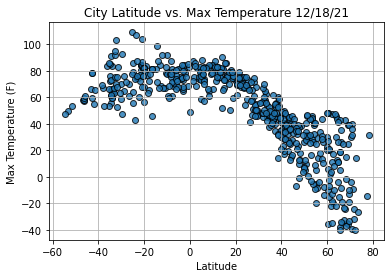

In [71]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

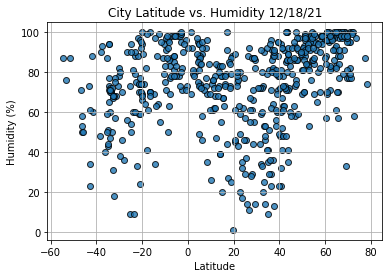

In [72]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

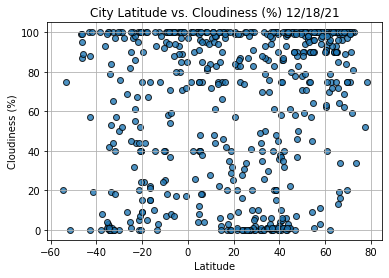

In [73]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

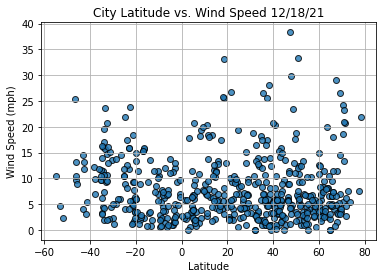

In [74]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [75]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [76]:
index13 = city_data_df.loc[13]
index13

City                       La Paz
Country                        BO
Date          2021-12-18 04:51:36
Lat                         -16.5
Lng                        -68.15
Max Temp                    46.38
Humidity                      100
Cloudiness                     75
Wind Speed                    2.3
Name: 13, dtype: object

In [77]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2021-12-18 04:53:51,42.0970,-79.2353,35.29,91,40,3.44
2,Chokurdakh,RU,2021-12-18 04:52:43,70.6333,147.9167,-39.08,100,75,5.50
3,Ribeira Grande,PT,2021-12-18 04:53:51,38.5167,-28.7000,60.22,56,100,14.03
4,Nakatsu,JP,2021-12-18 04:53:52,33.5981,131.1883,46.18,46,93,14.03
5,Upernavik,GL,2021-12-18 04:53:52,72.7868,-56.1549,14.70,58,100,7.58


In [78]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

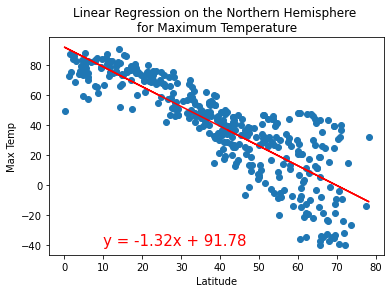

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(10,-40))

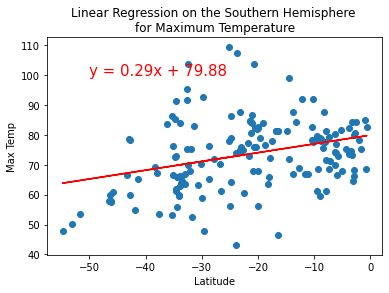

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,100))

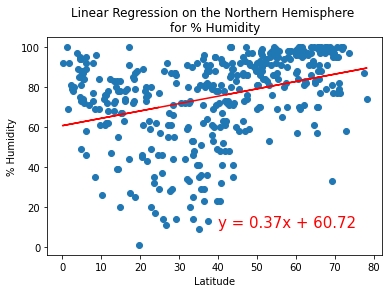

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for % Humidity', '% Humidity',(40,10))

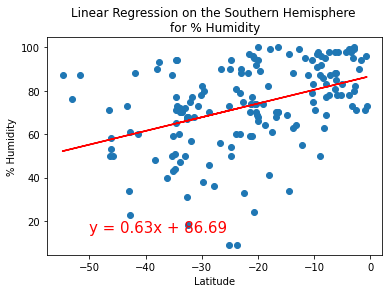

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

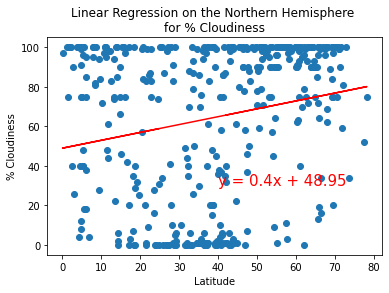

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for % Cloudiness', '% Cloudiness',(40,30))

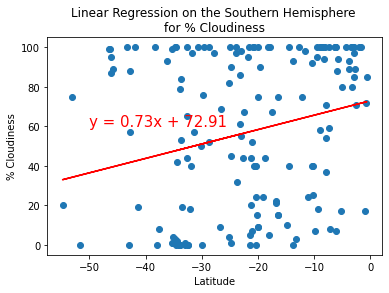

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

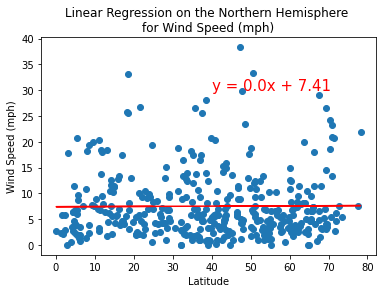

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Wind Speed (mph)', 'Wind Speed (mph)',(40,30))

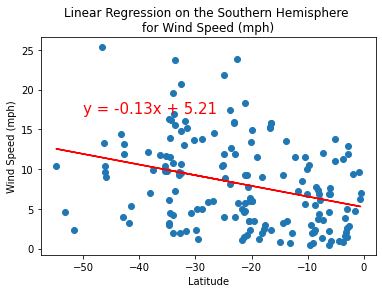

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed (mph)', 'Wind Speed (mph)',(-50,17))